In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

In [5]:
rBPFiles = [rBPFile for rBPFile in os.listdir() if rBPFile.startswith('rBP')]

['rBPTop25.txt',
 'rBPTop50.txt',
 'rBPTop600.txt',
 'rBPTop350.txt',
 'rBPTop850.txt',
 'rBPTop100.txt',
 'rBPTopAll.txt']

In [12]:
rnaBP25 = pd.read_table('rBPTop25.txt').rename(columns={'pValue':'25'})[['GeneSet', '25']]
rnaBP50 = pd.read_table('rBPTop50.txt').rename(columns={'pValue':'50'})[['GeneSet', '50']]
rnaBP100 = pd.read_table('rBPTop100.txt').rename(columns={'pValue':'100'})[['GeneSet', '100']]
rnaBP350 = pd.read_table('rBPTop350.txt').rename(columns={'pValue':'350'})[['GeneSet', '350']]
rnaBP600 = pd.read_table('rBPTop600.txt').rename(columns={'pValue':'600'})[['GeneSet', '600']]
rnaBP850 = pd.read_table('rBPTop850.txt').rename(columns={'pValue':'850'})[['GeneSet', '850']]
rnaBPAll = pd.read_table('rBPTopAll.txt').rename(columns={'pValue':'All'})[['GeneSet', 'All']]

rnaBPs = [rnaBP25, rnaBP50, rnaBP100, rnaBP350, rnaBP600, rnaBP850, rnaBPAll]

rnaBPDF = rnaBPs[0]
for rnaBP in rnaBPs[1:]:
    rnaBPDF = pd.merge(rnaBPDF, rnaBP, how='outer', on='GeneSet')

rnaBPDF['# NaN'] = rnaBPDF.isnull().sum(axis=1)
rnaBPDF = rnaBPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in rnaBPDF['GeneSet']]
rnaBPDF['GeneSet'] = GeneSetNew

colNames = ['25', '50', '100', '350', '600', '850', 'All']
for colName in colNames:
    rnaBPDF[colName] = [-(math.log(pvals, 10)) for pvals in rnaBPDF[colName]]

rnaBPDF

,GeneSet,25,50,100,350,600,850,All,# NaN
0,regulation of intracellular signal transduction,NaN,4.480172,5.214670,12.209012,17.472370,19.273273,26.823909,1
1,positive regulation of multicellular organisma...,NaN,5.068542,5.318759,8.892790,15.653647,22.876148,27.838632,1
2,positive regulation of response to stimulus,NaN,NaN,5.806875,14.903090,20.966576,28.707744,34.872895,2
3,regulation of response to stress,NaN,4.892790,5.081970,11.325139,NaN,NaN,23.218963,3
4,regulation of cell death,3.950782,4.882729,6.571865,NaN,NaN,NaN,22.039054,3
5,positive regulation of cell communication,NaN,NaN,NaN,13.982967,17.974694,23.185752,27.995679,3
6,positive regulation of molecular function,NaN,NaN,NaN,11.712198,16.331614,20.853872,24.486782,3
7,positive regulation of cytokine production,4.340084,4.463442,4.966576,8.869666,NaN,NaN,NaN,3
8,positive regulation of biosynthetic process,NaN,NaN,NaN,9.869666,20.856985,28.094744,31.386158,3
9,immune system process,NaN,NaN,NaN,9.744727,17.365523,22.047208,27.455932,3


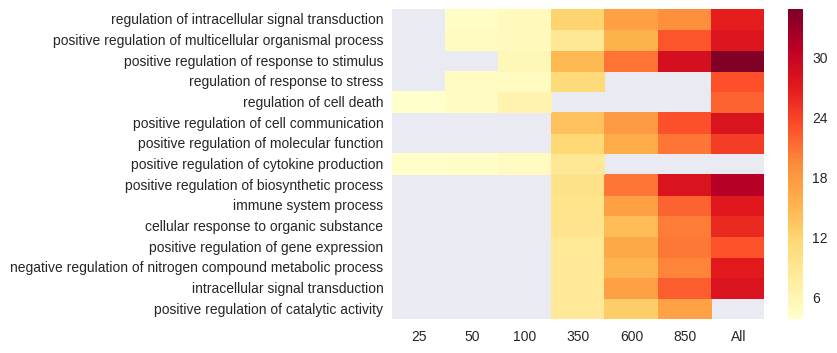

In [16]:
sns.heatmap(rnaBPDF.ix[:, 1:-1], cmap="YlOrRd", yticklabels=list(rnaBPDF['GeneSet']))

In [17]:
rnaCC25 = pd.read_table('rCCTop25.txt').rename(columns={'pValue':'25'})[['GeneSet', '25']]
rnaCC50 = pd.read_table('rCCTop50.txt').rename(columns={'pValue':'50'})[['GeneSet', '50']]
rnaCC100 = pd.read_table('rCCTop100.txt').rename(columns={'pValue':'100'})[['GeneSet', '100']]
rnaCC350 = pd.read_table('rCCTop350.txt').rename(columns={'pValue':'350'})[['GeneSet', '350']]
rnaCC600 = pd.read_table('rCCTop600.txt').rename(columns={'pValue':'600'})[['GeneSet', '600']]
rnaCC850 = pd.read_table('rCCTop850.txt').rename(columns={'pValue':'850'})[['GeneSet', '850']]
rnaCCAll = pd.read_table('rCCTopAll.txt').rename(columns={'pValue':'All'})[['GeneSet', 'All']]

rnaCCs = [rnaCC25, rnaCC50, rnaCC100, rnaCC350, rnaCC600, rnaCC850, rnaCCAll]

rnaCCDF = rnaCCs[0]
for rnaCC in rnaCCs[1:]:
    rnaCCDF = pd.merge(rnaCCDF, rnaCC, how='outer', on='GeneSet')

rnaCCDF['# NaN'] = rnaCCDF.isnull().sum(axis=1)
rnaCCDF = rnaCCDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in rnaCCDF['GeneSet']]
rnaCCDF['GeneSet'] = GeneSetNew

colNames = ['25', '50', '100', '350', '600', '850', 'All']
for colName in colNames:
    rnaCCDF[colName] = [-(math.log(pvals, 10)) for pvals in rnaCCDF[colName]]

rnaCCDF

,GeneSet,25,50,100,350,600,850,All,# NaN
0,membrane region,3.496209,5.798603,4.723538,8.004804,9.334419,12.275724,10.079355,0
1,plasma membrane region,NaN,5.446117,4.714443,7.920819,7.962574,10.826814,8.452225,1
2,intrinsic component of plasma membrane,NaN,3.679854,6.705534,7.671620,7.359519,10.619789,13.527244,1
3,cell projection,NaN,3.446117,5.528708,6.850781,11.149967,18.279014,18.562249,1
4,centriole,4.627088,3.823909,5.663540,5.107905,7.384050,NaN,NaN,2
5,microtubule organizing center part,4.172631,3.373660,4.917215,4.122053,5.829738,NaN,NaN,2
6,cell projection part,NaN,NaN,3.165579,5.412289,6.754487,12.705534,12.386158,2
7,neuron projection,NaN,NaN,3.177832,4.899629,7.815309,10.619789,10.039529,2
8,mitochondrion,NaN,NaN,3.331614,6.749580,8.354578,13.051098,15.091515,2
9,perinuclear region of cytoplasm,NaN,NaN,3.472370,6.107905,8.863279,8.647817,12.534617,2


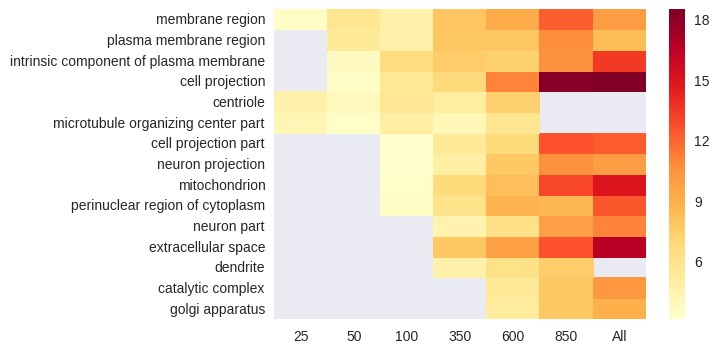

In [21]:
sns.heatmap(rnaCCDF.ix[:, 1:-1], cmap="YlOrRd", yticklabels=list(rnaCCDF['GeneSet']))

In [22]:
rnaMF25 = pd.read_table('rMFTop25.txt').rename(columns={'pValue':'25'})[['GeneSet', '25']]
rnaMF50 = pd.read_table('rMFTop50.txt').rename(columns={'pValue':'50'})[['GeneSet', '50']]
rnaMF100 = pd.read_table('rMFTop100.txt').rename(columns={'pValue':'100'})[['GeneSet', '100']]
rnaMF350 = pd.read_table('rMFTop350.txt').rename(columns={'pValue':'350'})[['GeneSet', '350']]
rnaMF600 = pd.read_table('rMFTop600.txt').rename(columns={'pValue':'600'})[['GeneSet', '600']]
rnaMF850 = pd.read_table('rMFTop850.txt').rename(columns={'pValue':'850'})[['GeneSet', '850']]
rnaMFAll = pd.read_table('rMFTopAll.txt').rename(columns={'pValue':'All'})[['GeneSet', 'All']]

rnaMFs = [rnaMF25, rnaMF50, rnaMF100, rnaMF350, rnaMF600, rnaMF850, rnaMFAll]

rnaMFDF = rnaMFs[0]
for rnaMF in rnaMFs[1:]:
    rnaMFDF = pd.merge(rnaMFDF, rnaMF, how='outer', on='GeneSet')

rnaMFDF['# NaN'] = rnaMFDF.isnull().sum(axis=1)
rnaMFDF = rnaMFDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in rnaMFDF['GeneSet']]
rnaMFDF['GeneSet'] = GeneSetNew

colNames = ['25', '50', '100', '350', '600', '850', 'All']
for colName in colNames:
    rnaMFDF[colName] = [-(math.log(pvals, 10)) for pvals in rnaMFDF[colName]]

rnaMFDF

,GeneSet,25,50,100,350,600,850,All,# NaN
0,enzyme binding,3.559091,3.527244,NaN,7.133122,10.655608,16.460924,17.982967,1
1,macromolecular complex binding,NaN,3.344862,5.305395,7.728158,10.078314,12.393619,18.268411,1
2,heat shock protein binding,6.793174,5.696804,4.473661,7.872895,8.012334,NaN,NaN,2
3,rna polymerase ii transcription factor activit...,NaN,NaN,3.525784,4.966576,8.438899,11.211832,12.860121,2
4,protein complex binding,NaN,NaN,3.920819,5.489455,6.866461,9.703335,13.634512,2
5,transporter activity,NaN,NaN,3.578396,NaN,6.510042,8.485452,10.099087,3
6,receptor binding,NaN,NaN,NaN,5.692504,11.829738,14.247184,17.308919,3
7,protein dimerization activity,NaN,NaN,3.943095,5.138466,NaN,11.042872,10.723538,3
8,nucleic acid binding transcription factor acti...,NaN,NaN,NaN,7.494850,15.405607,21.386158,25.655608,3
9,transmembrane transporter activity,NaN,3.338187,4.454693,6.158015,6.732828,NaN,NaN,3


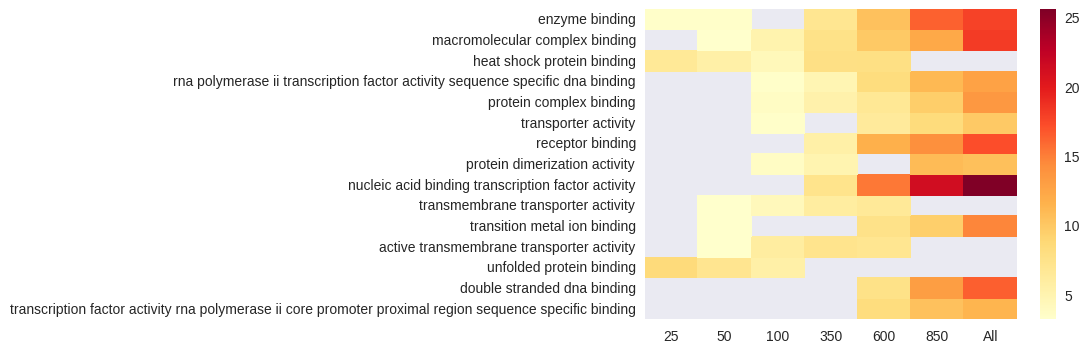

In [24]:
sns.heatmap(rnaMFDF.ix[:, 1:-1], cmap="YlOrRd", yticklabels=list(rnaMFDF['GeneSet']))